In [1]:
# Imports - run first
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from geoscripts.dz import dz

samples_published = dz.load_all()

samples_new = dz.load_all('UCD22/')

samples = samples_published + samples_new

def plot_fault_block(names,save=False,filename=None,xlim=(100,4000),log_scale=True,
                        ticks = [100,200,300,400,500,1000,2000,3000]):
    smps = [smp for smp in samples if smp.name in names]
    
    nplots = len(names)
    height = nplots*1.5
    
    fig,axs = plt.subplots(nplots,sharex=True,dpi=300,figsize=(7.5,height))
    
    if len(names)==1:
        smp = smps[0]
        smp.kde(ax=axs,log_scale=log_scale,ticks=ticks)
        axs.set_title(smp.name)
        axs.set_xlim(xlim[0],xlim[1])
    
    else:
        for k,smp in enumerate(smps):
            smp.kde(ax=axs[k],log_scale=log_scale,ticks=ticks)
            axs[k].set_title(smp.name)
            axs[k].set_xlim(xlim[0],xlim[1])

    plt.tight_layout()
    
    if save == True:
        fig.savefig(filename)
    
    return(smps)

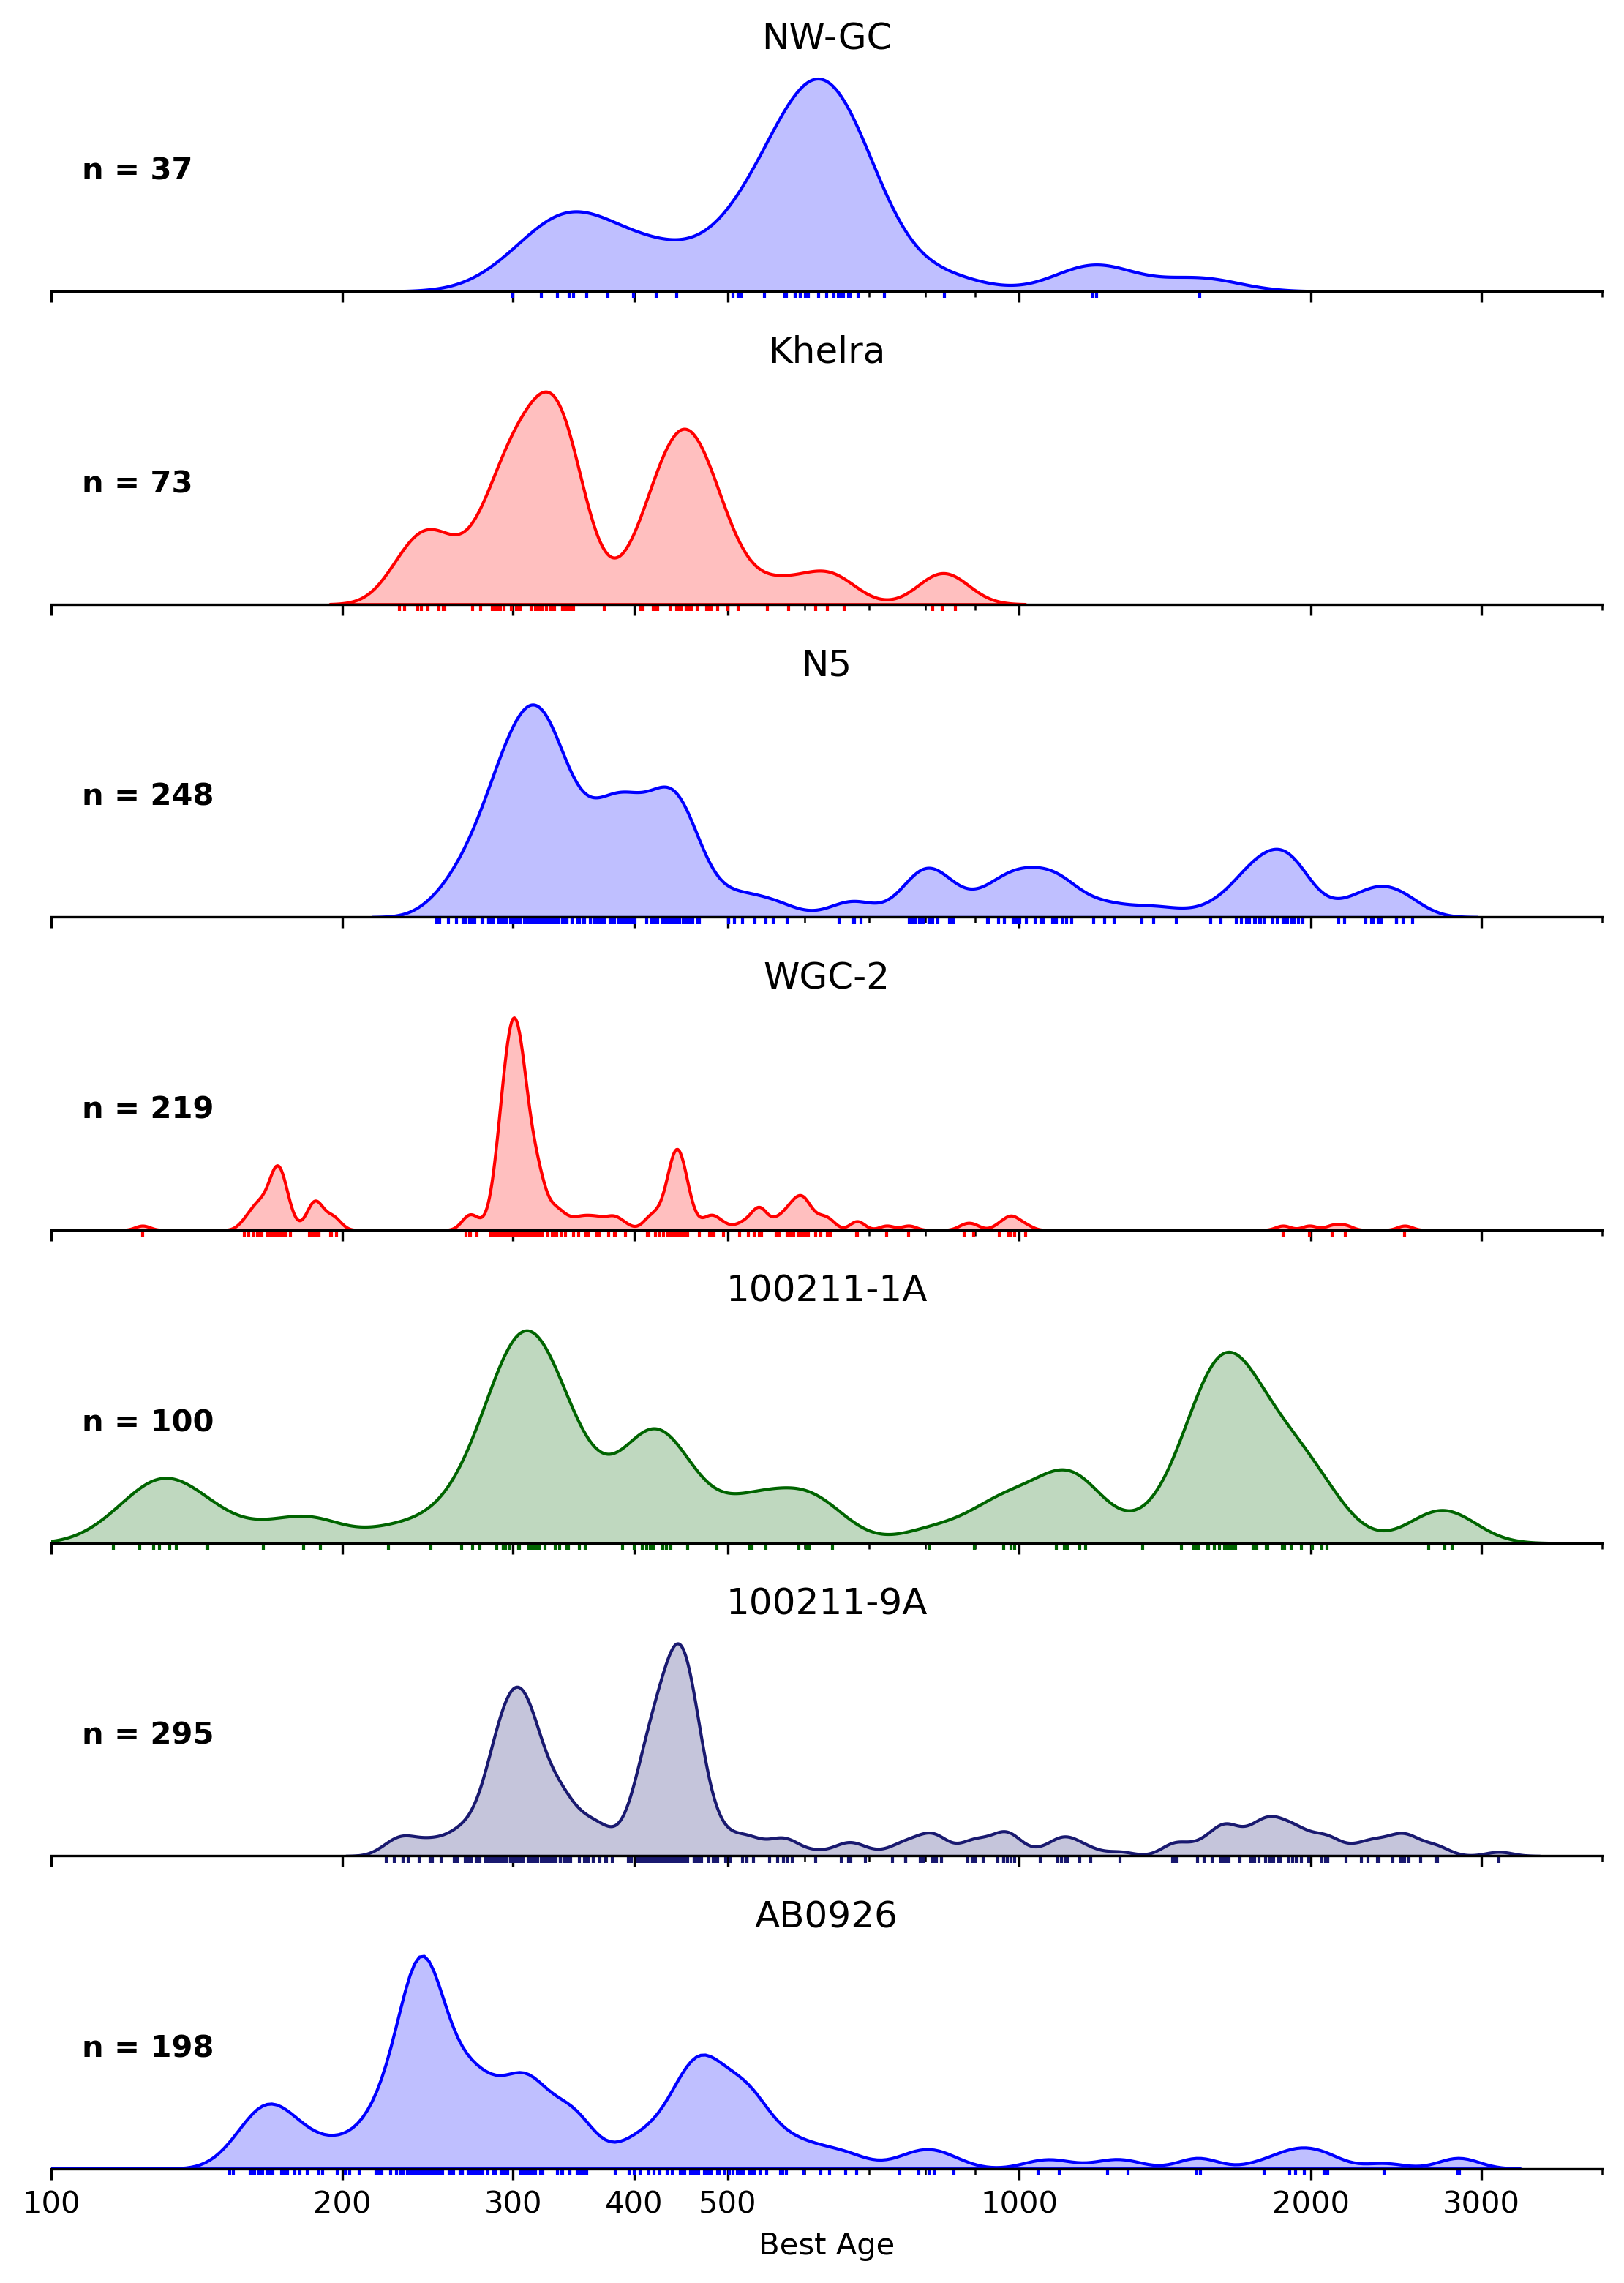

In [2]:
dizi_names = ['NW-GC','N5','Khelra','WGC-2','100211-9A','100211-1A','AB0926']

dizi_samples = plot_fault_block(dizi_names,save=True,filename='dizi_block.pdf')


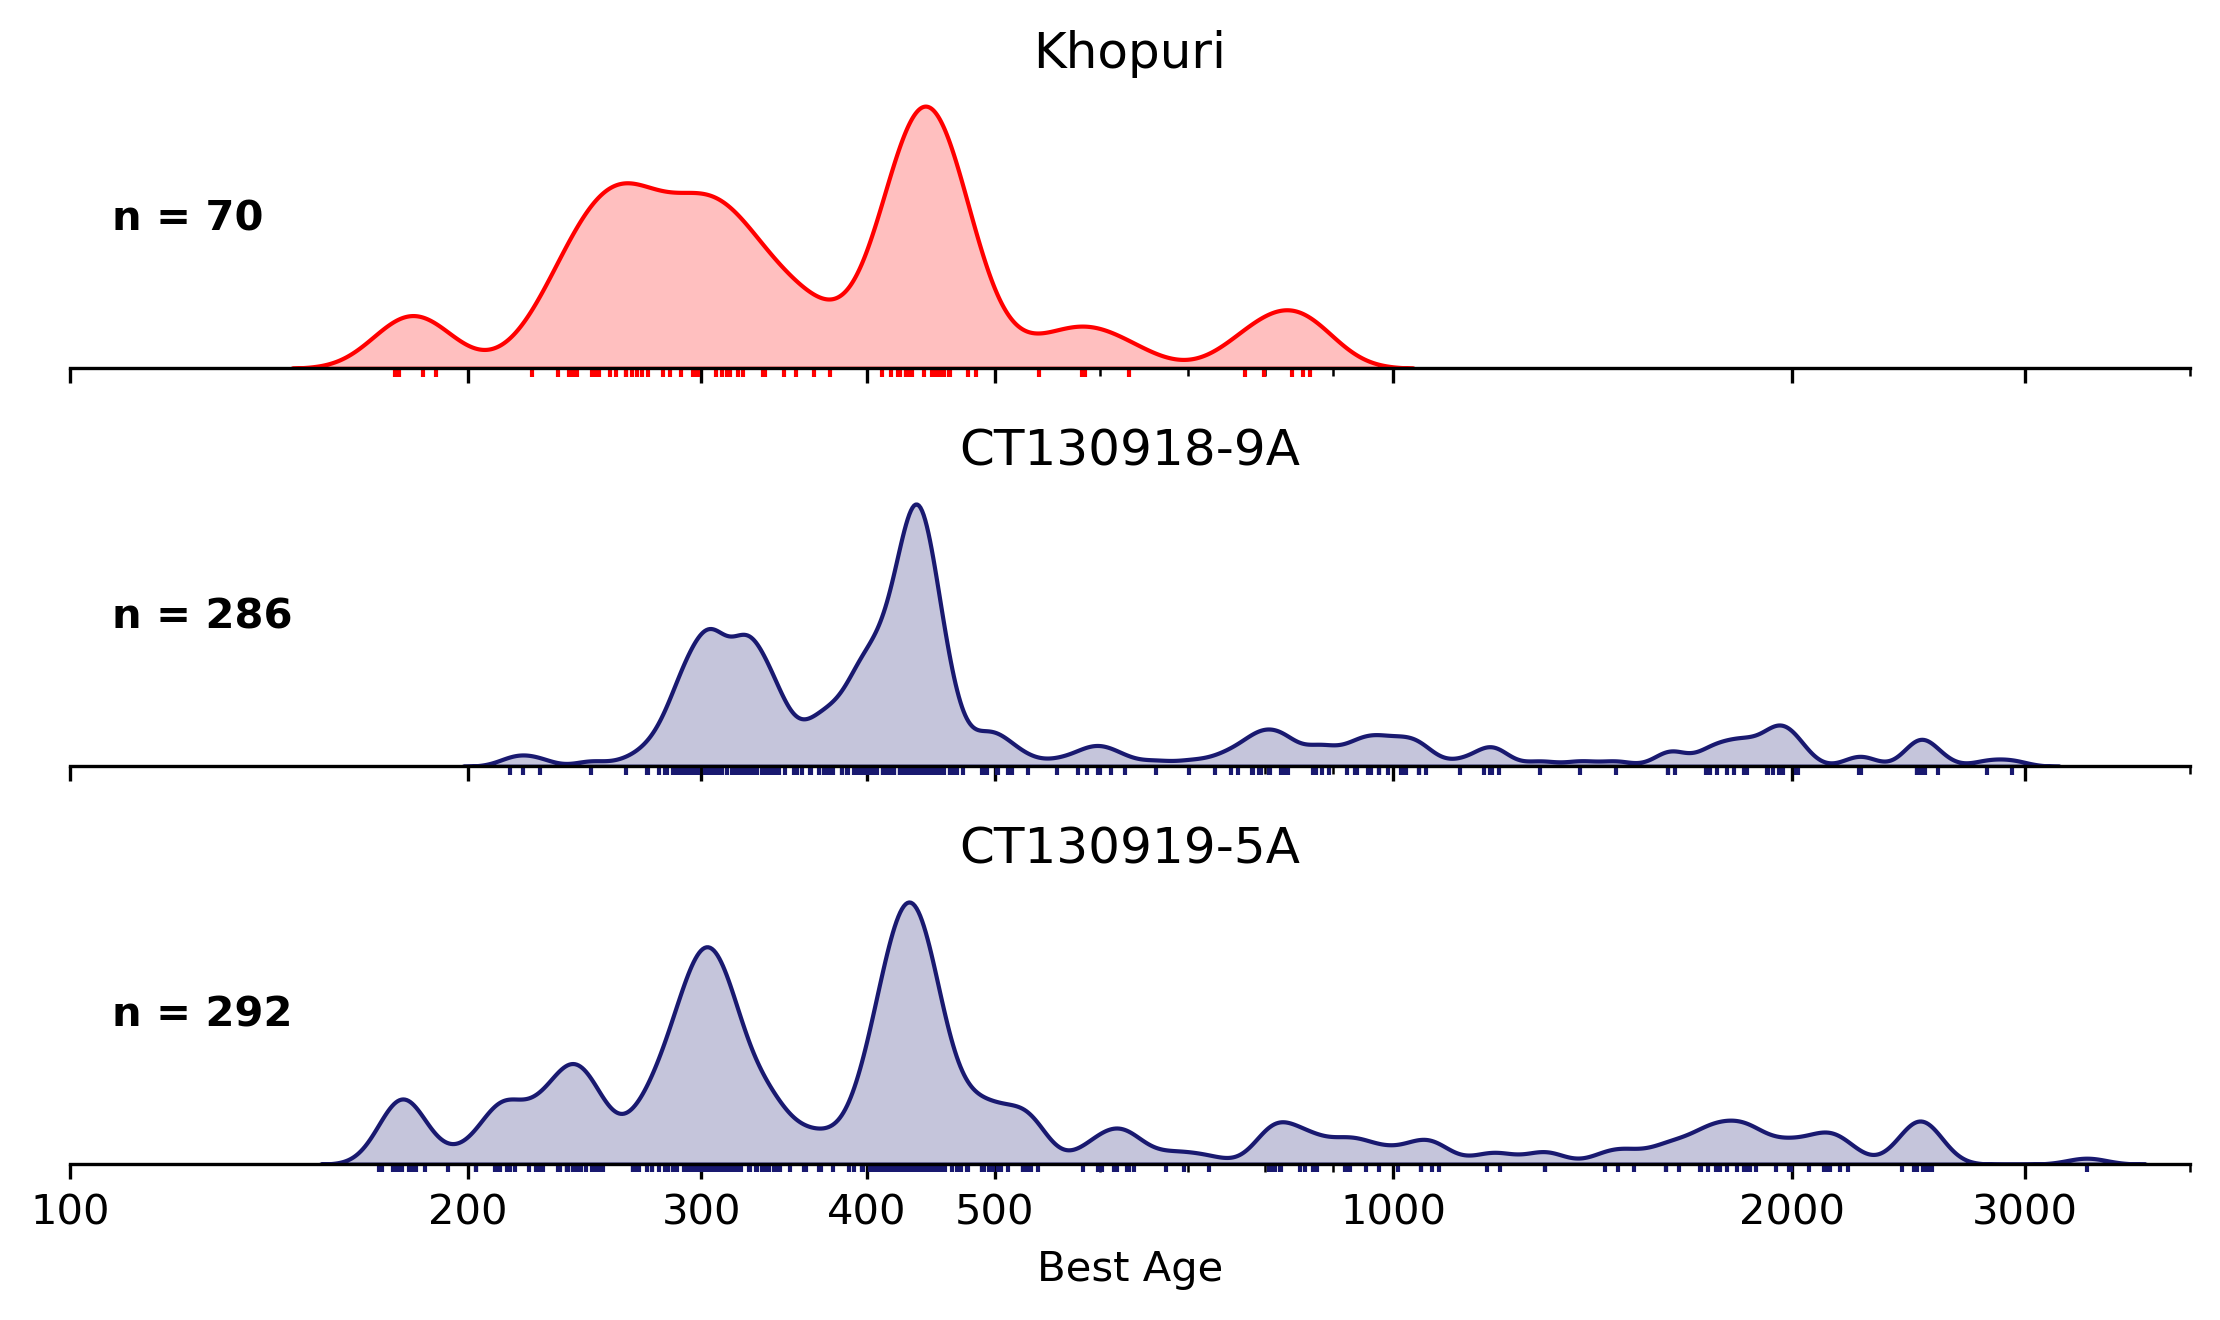

In [3]:
idliani_names = ['Khopuri','CT130918-9A','CT130919-5A']

plot_fault_block(idliani_names,save=True,filename='idliani_block.pdf')

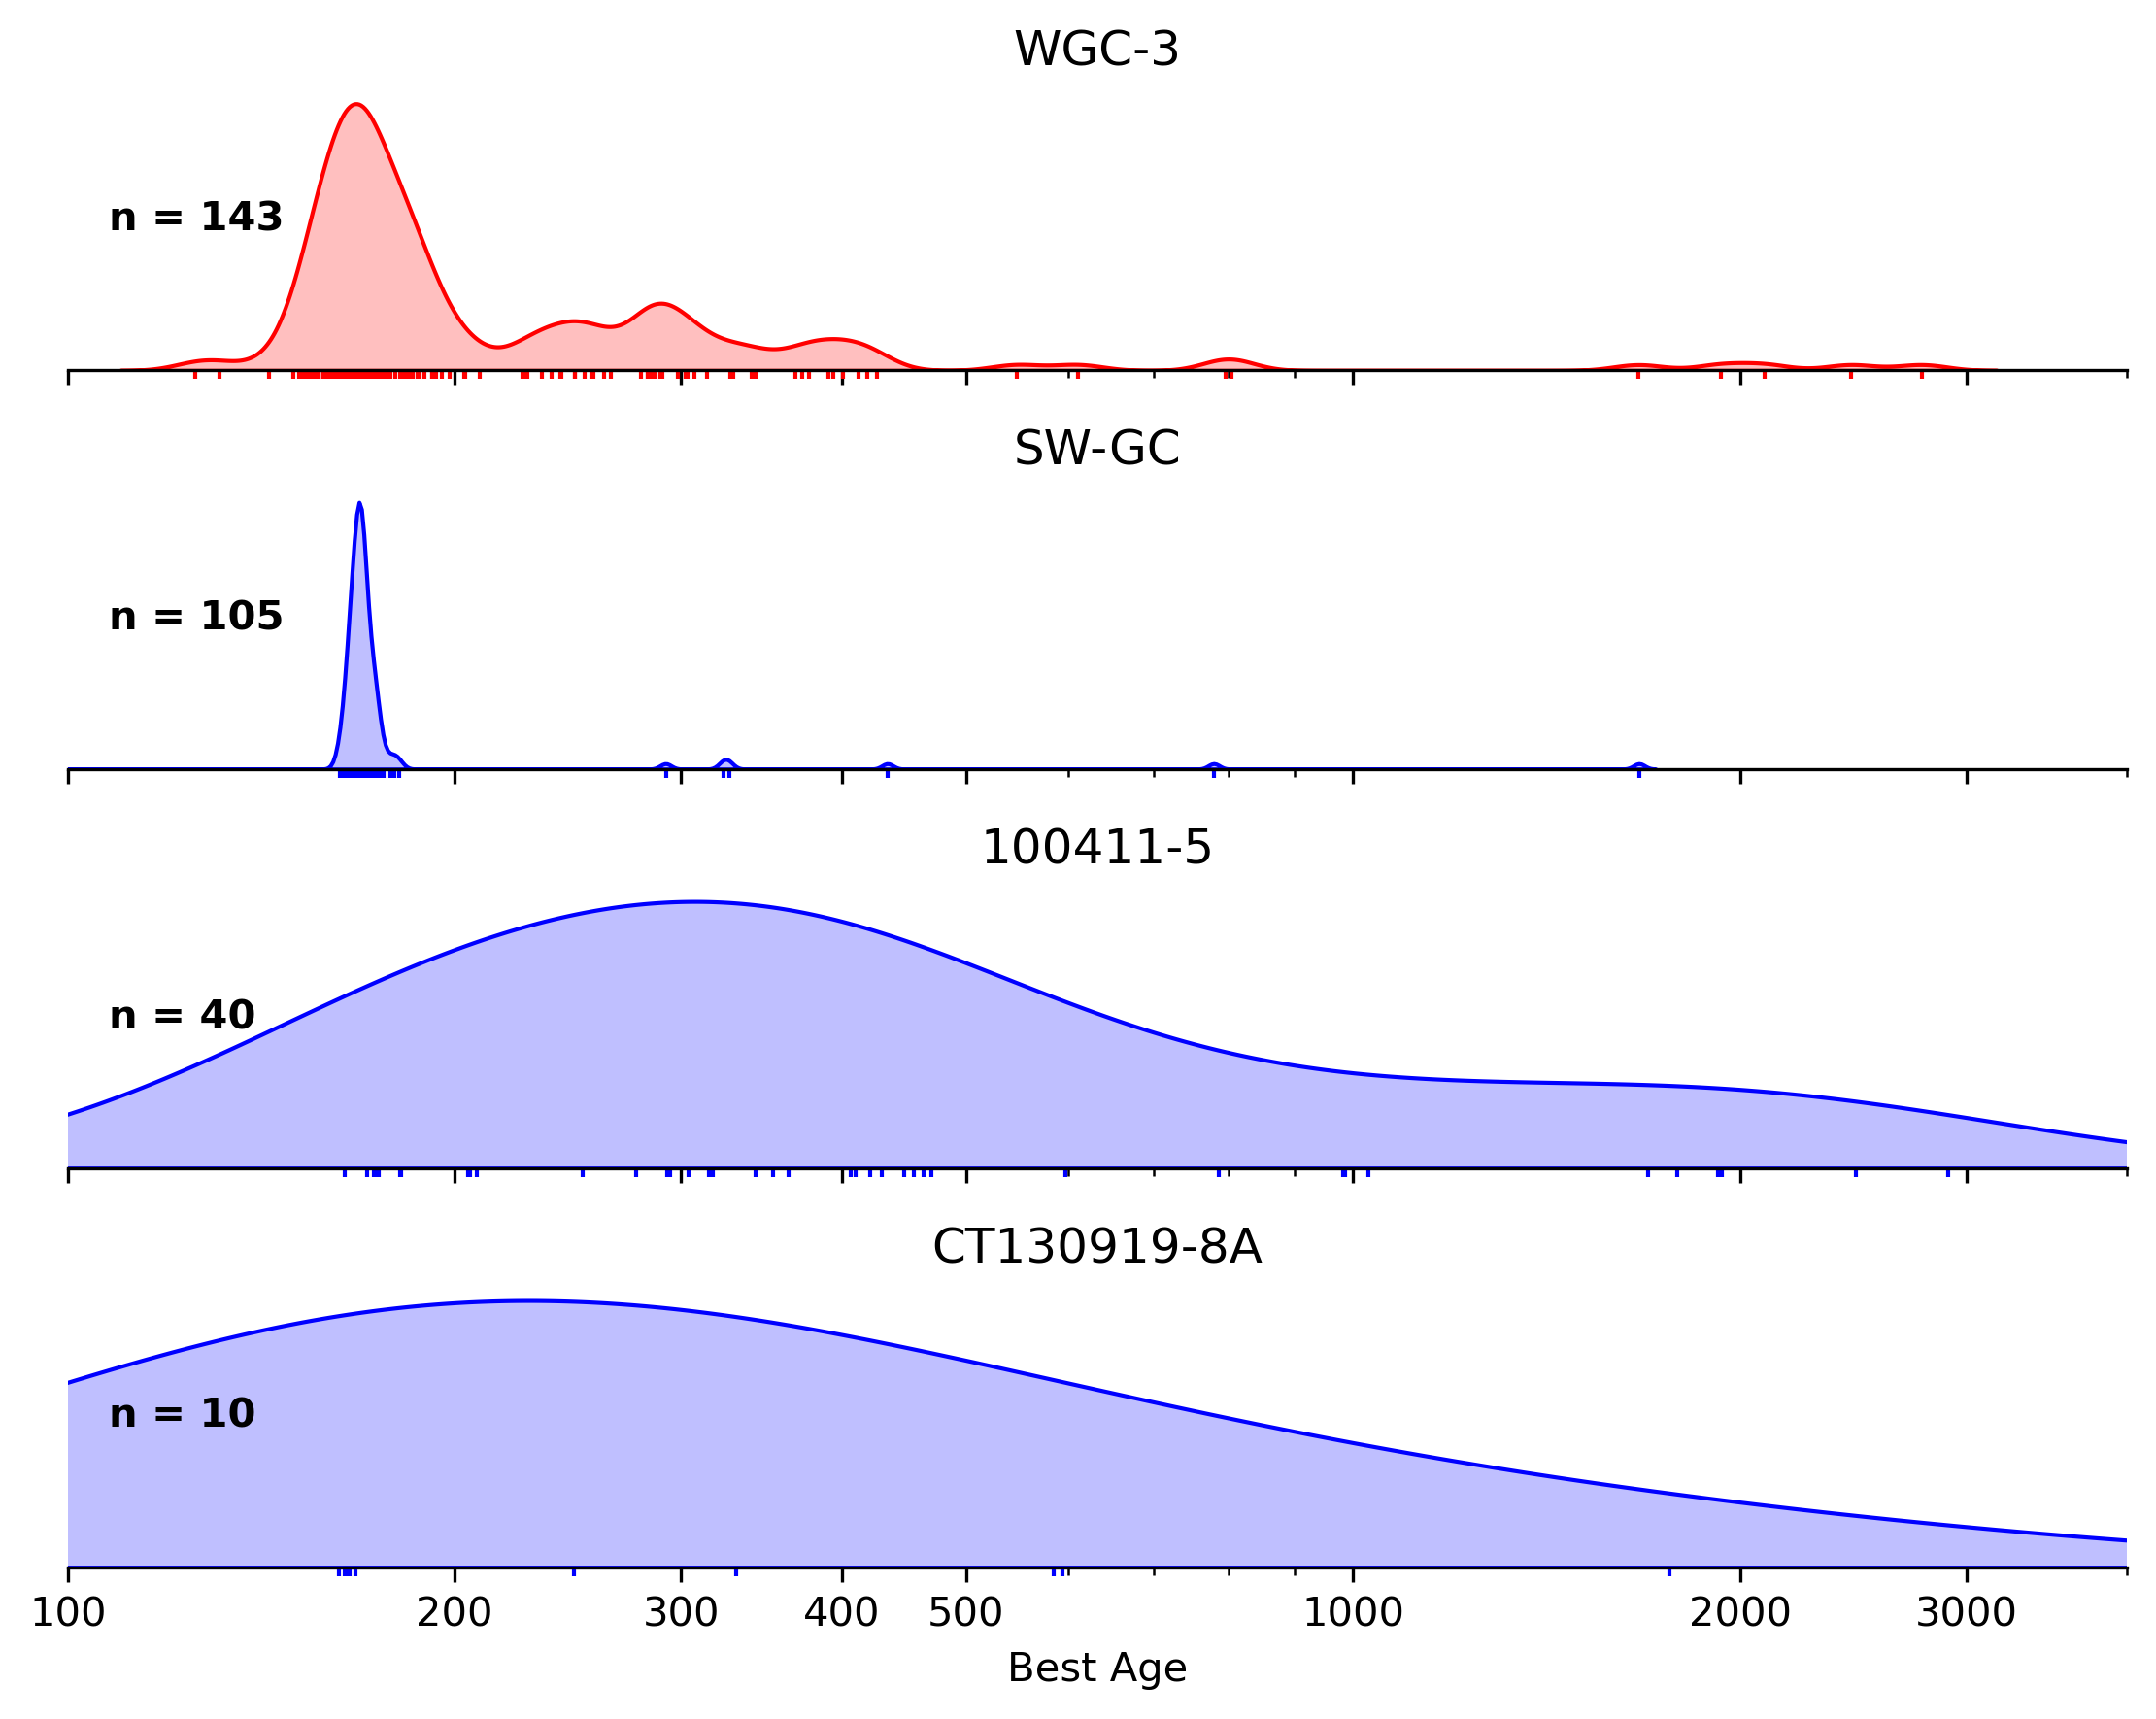

In [4]:
jvari_names = ['SW-GC','WGC-3','CT130919-8A','100411-5']

plot_fault_block(jvari_names,save=True,filename='jvari_block.pdf')

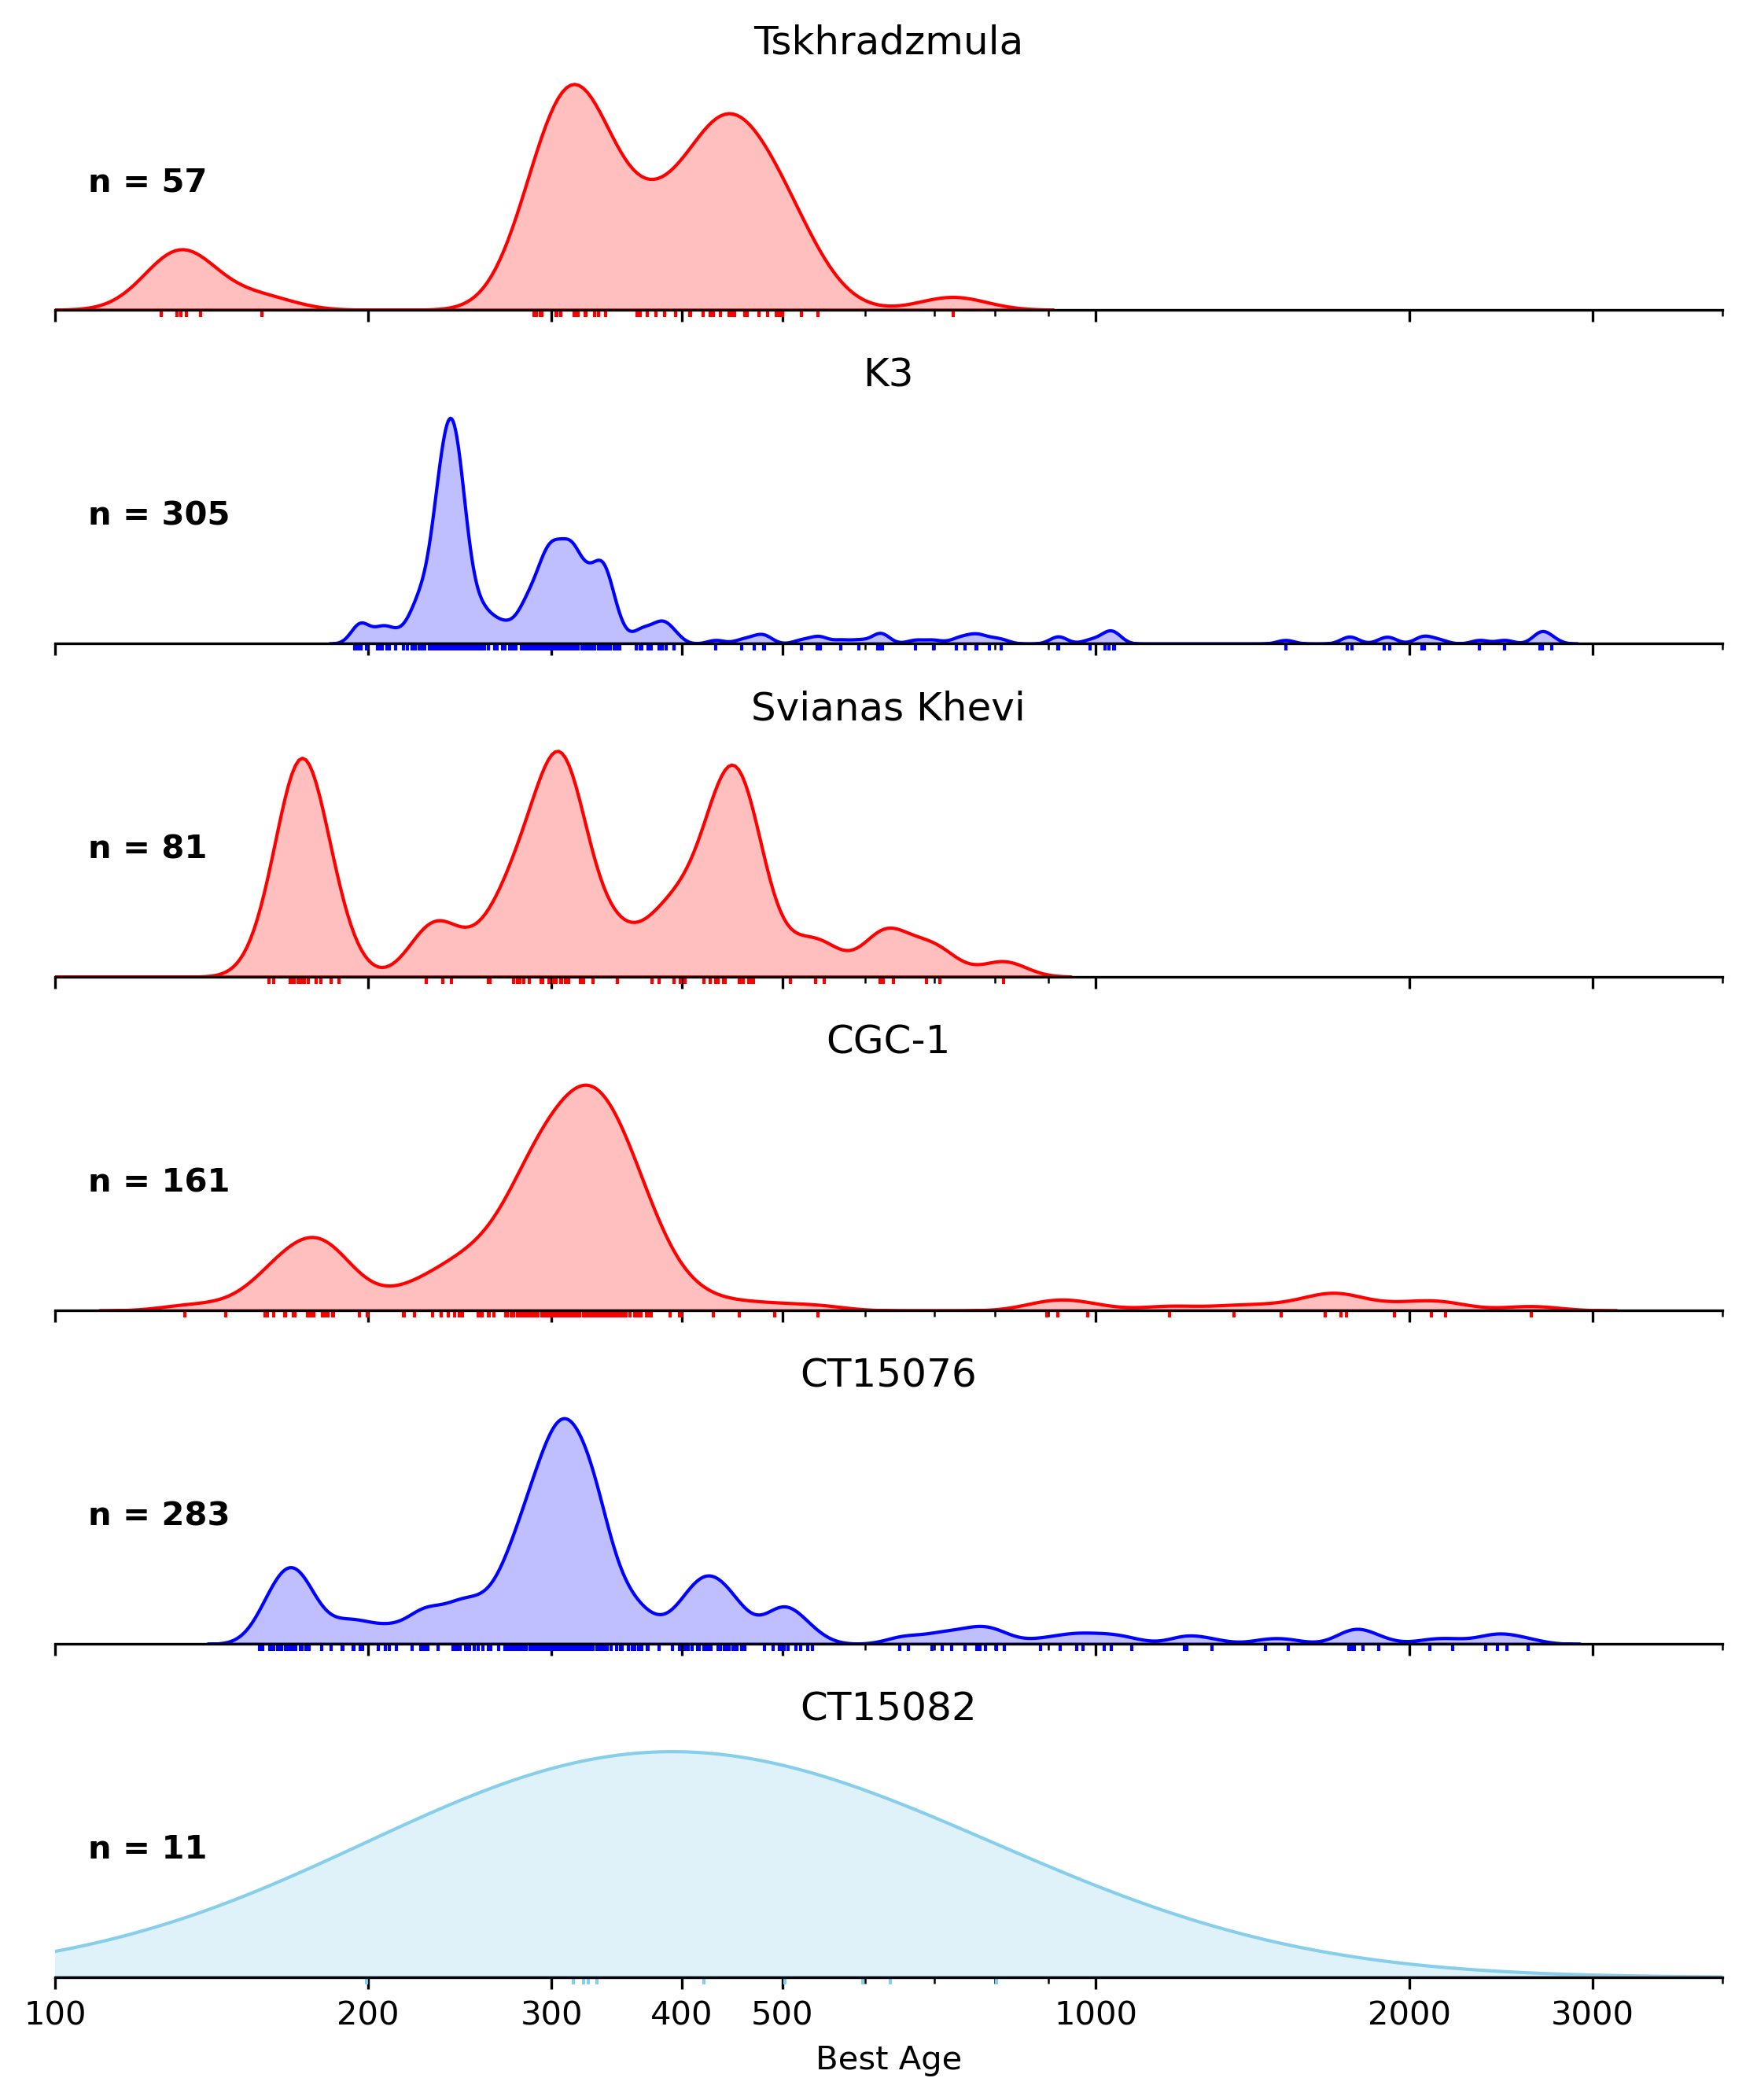

In [5]:
gvpas_names = ['K3','CT15076','CT15082','Tskhradzmula','Svianas Khevi','CGC-1']

gvpas_samples = plot_fault_block(gvpas_names,save=True,filename='gveleti_pasanuari_block.pdf')

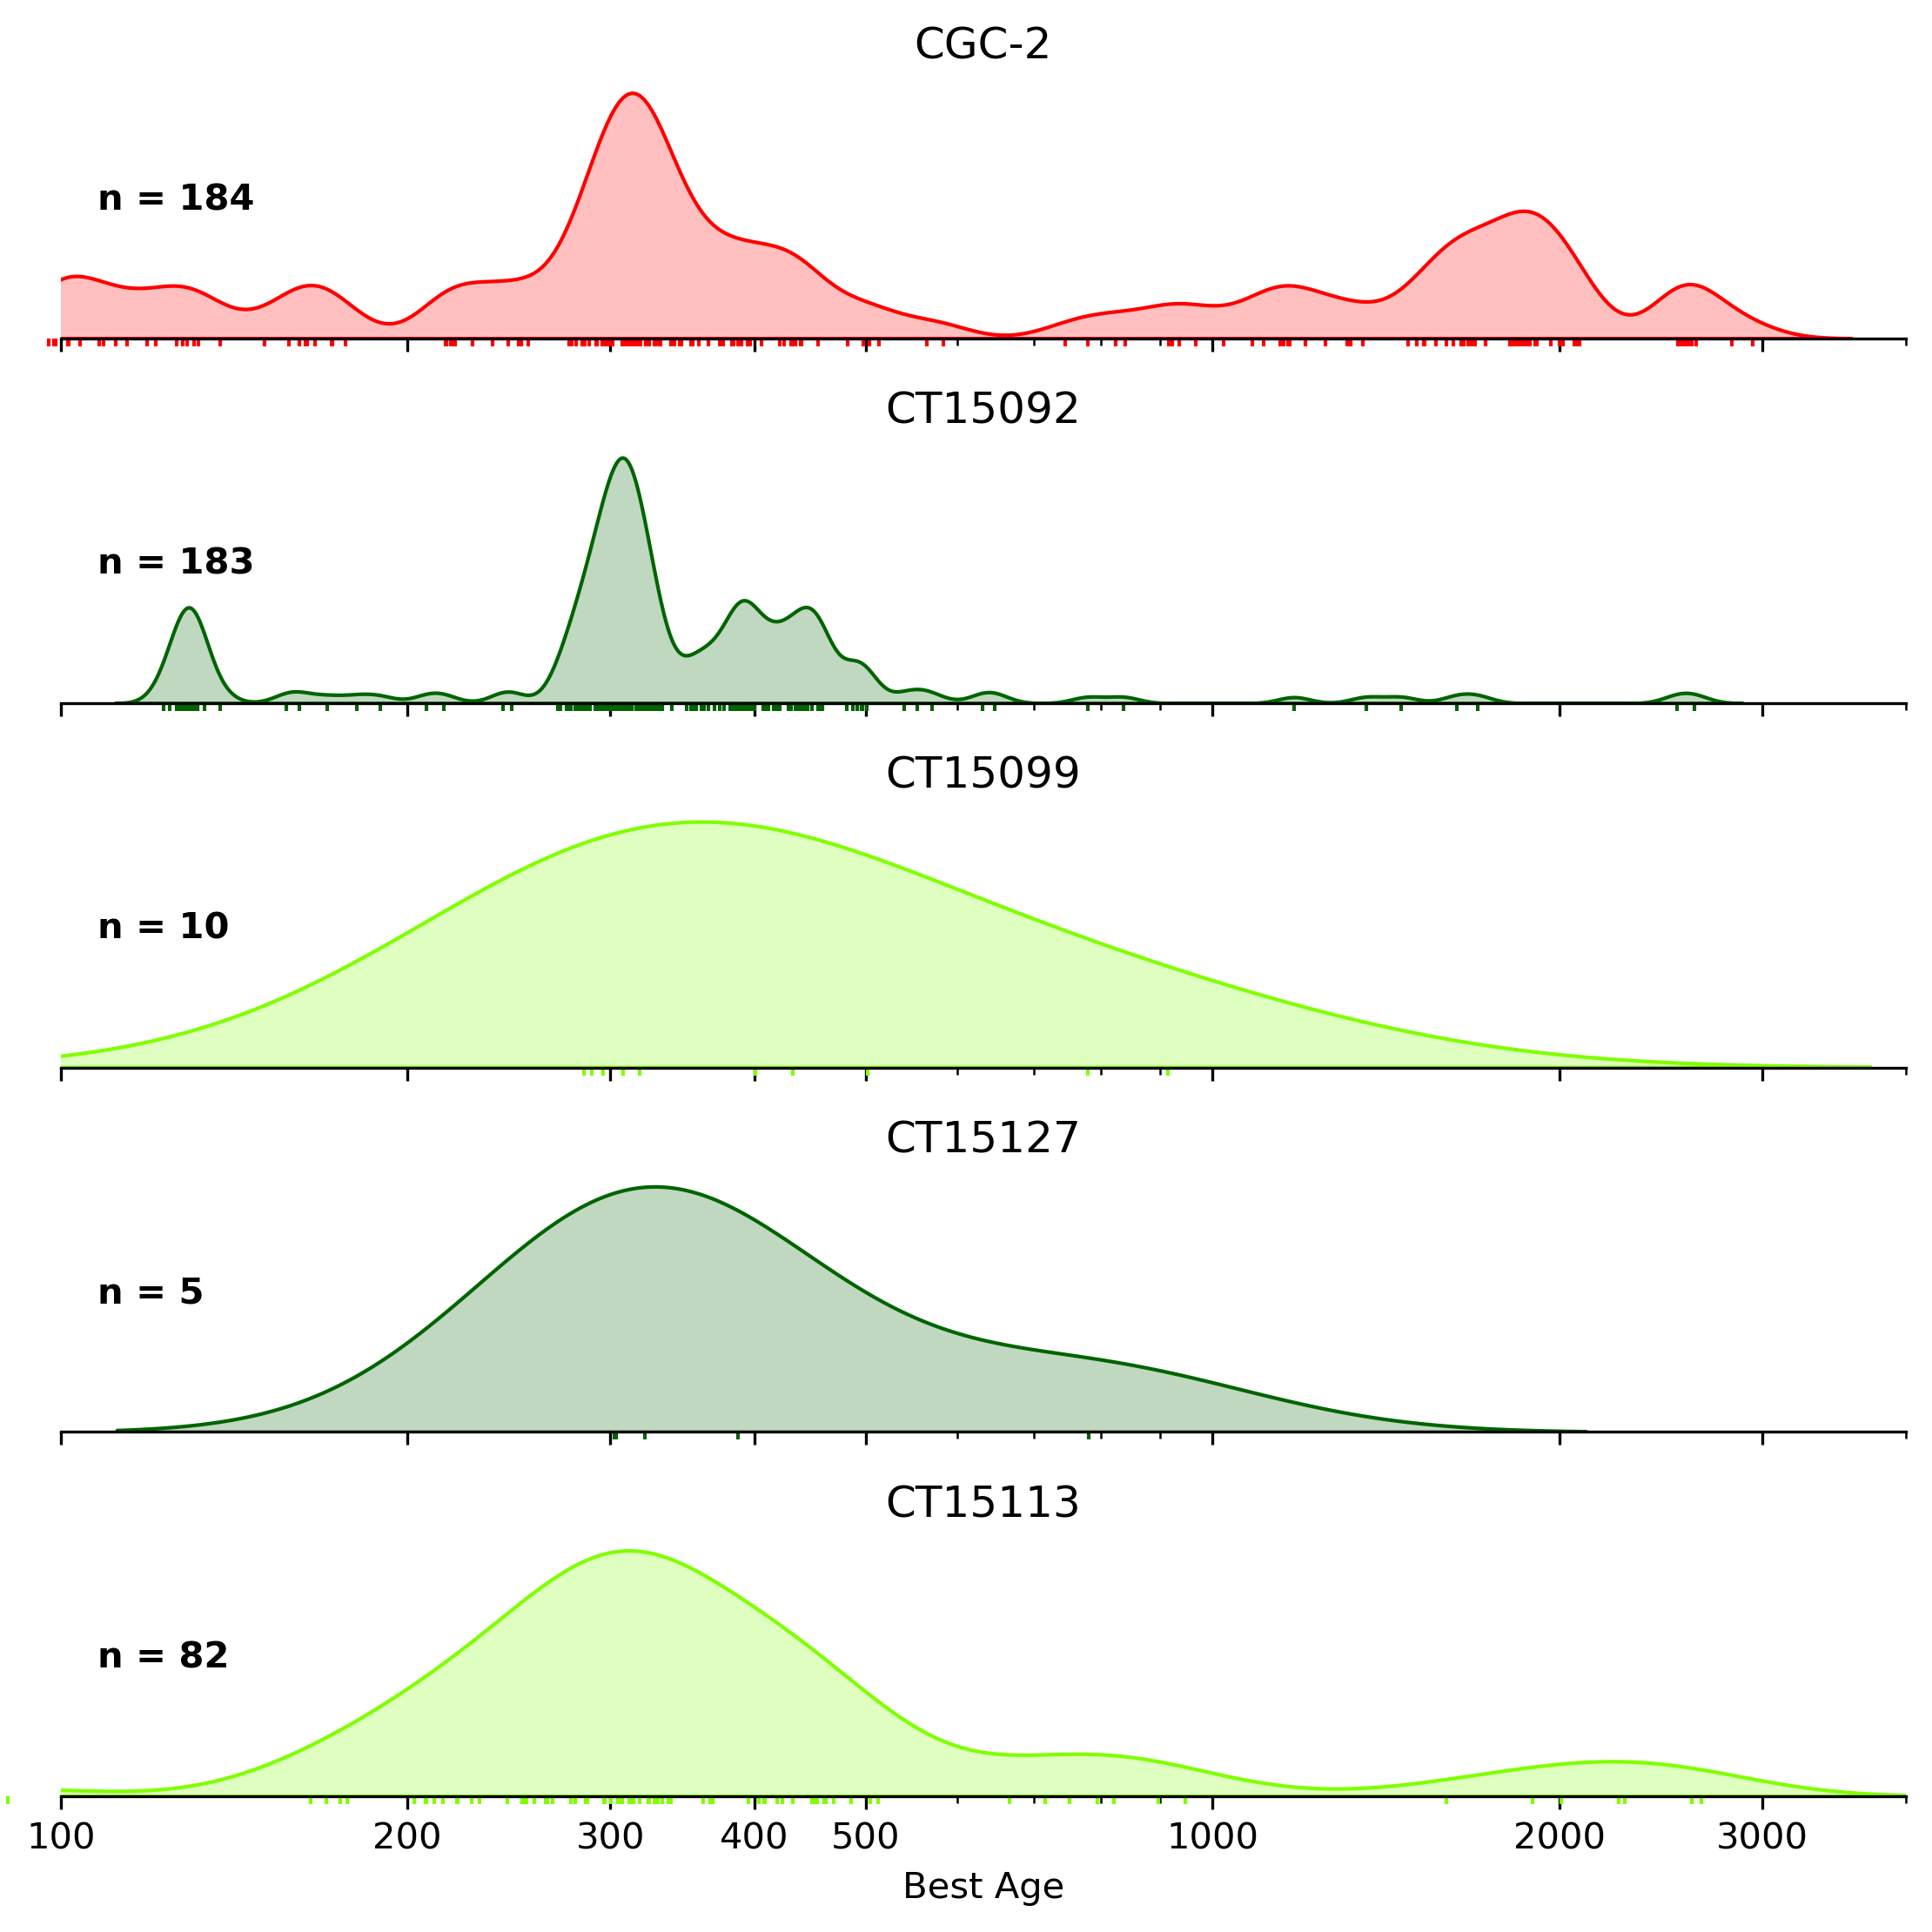

In [6]:
ana_names = ['CT15099','CT15092','CT15113','CT15127','CGC-2']

ana_samples = plot_fault_block(ana_names,save=True,filename='ananuri_block.pdf')

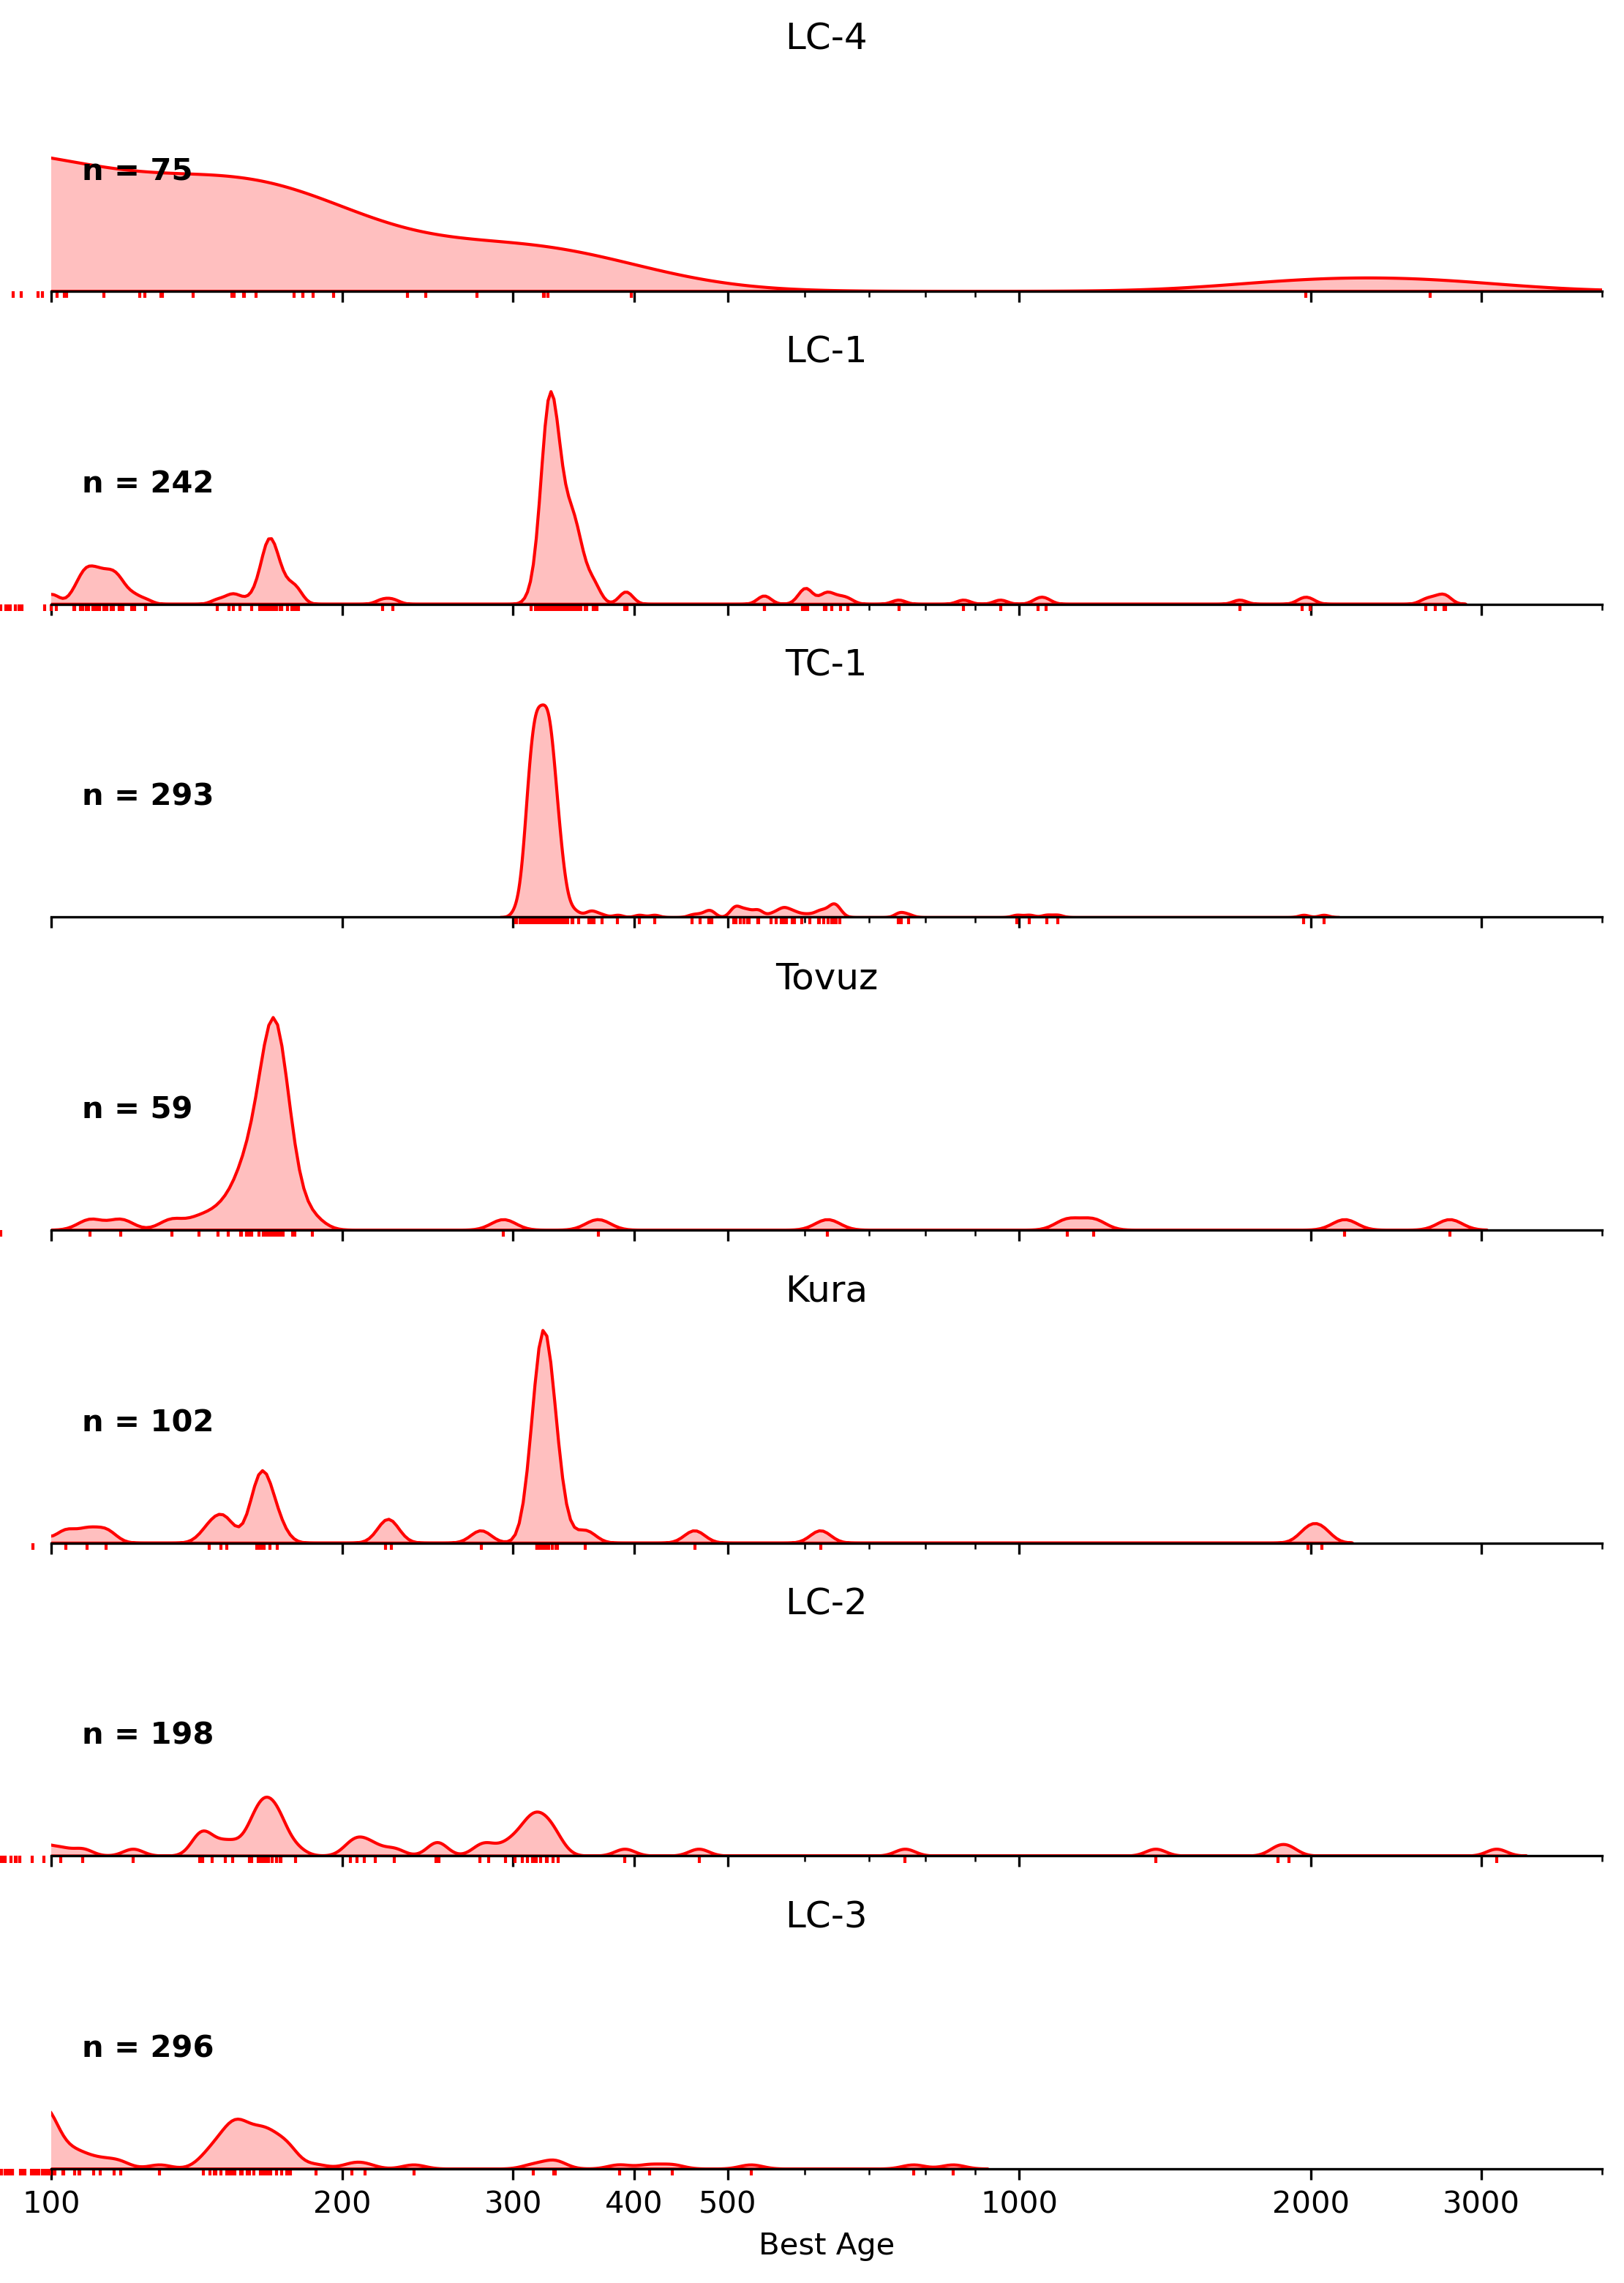

In [7]:
lc_names = ['Tovuz','LC-1','TC-1','LC-4','LC-2','LC-3','Kura']

lc_samples = plot_fault_block(lc_names,save=True,filename='LC.pdf')

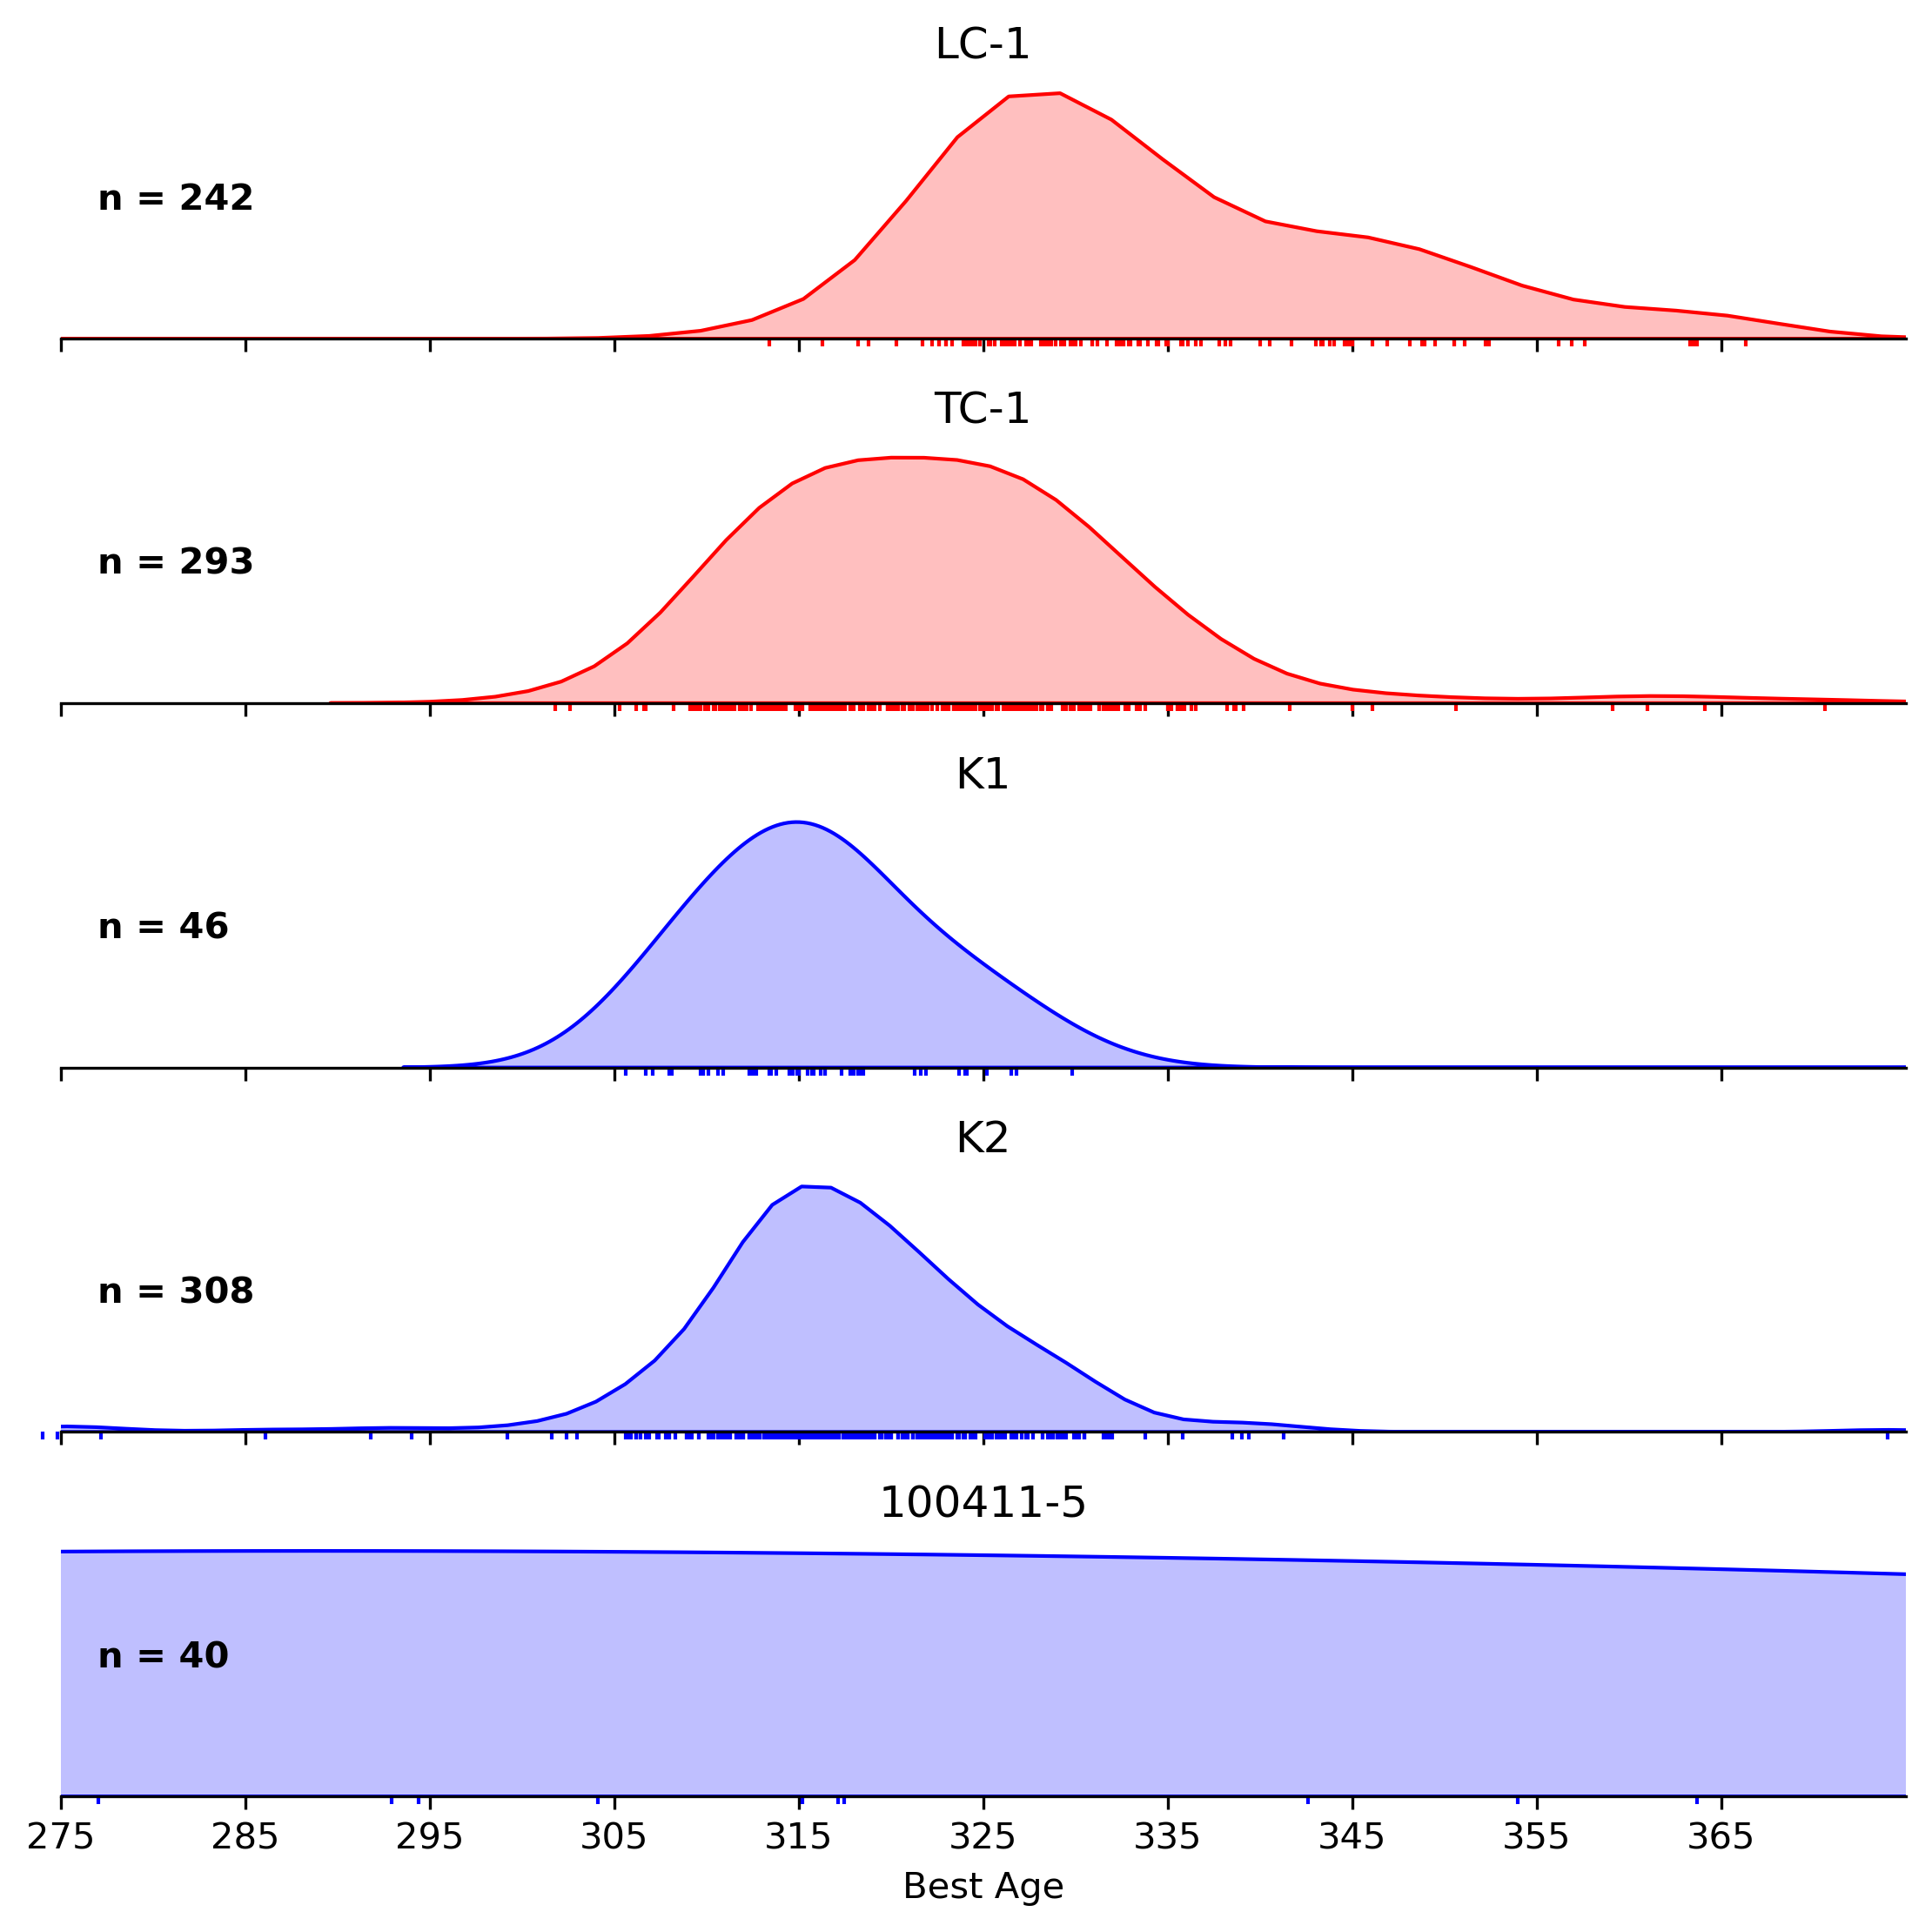

In [8]:
base_names = ['K1','TC-1','K2','LC-1','100411-5']

base_samples = plot_fault_block(base_names,log_scale=False,xlim=(275,375),ticks=np.arange(275,375,10))

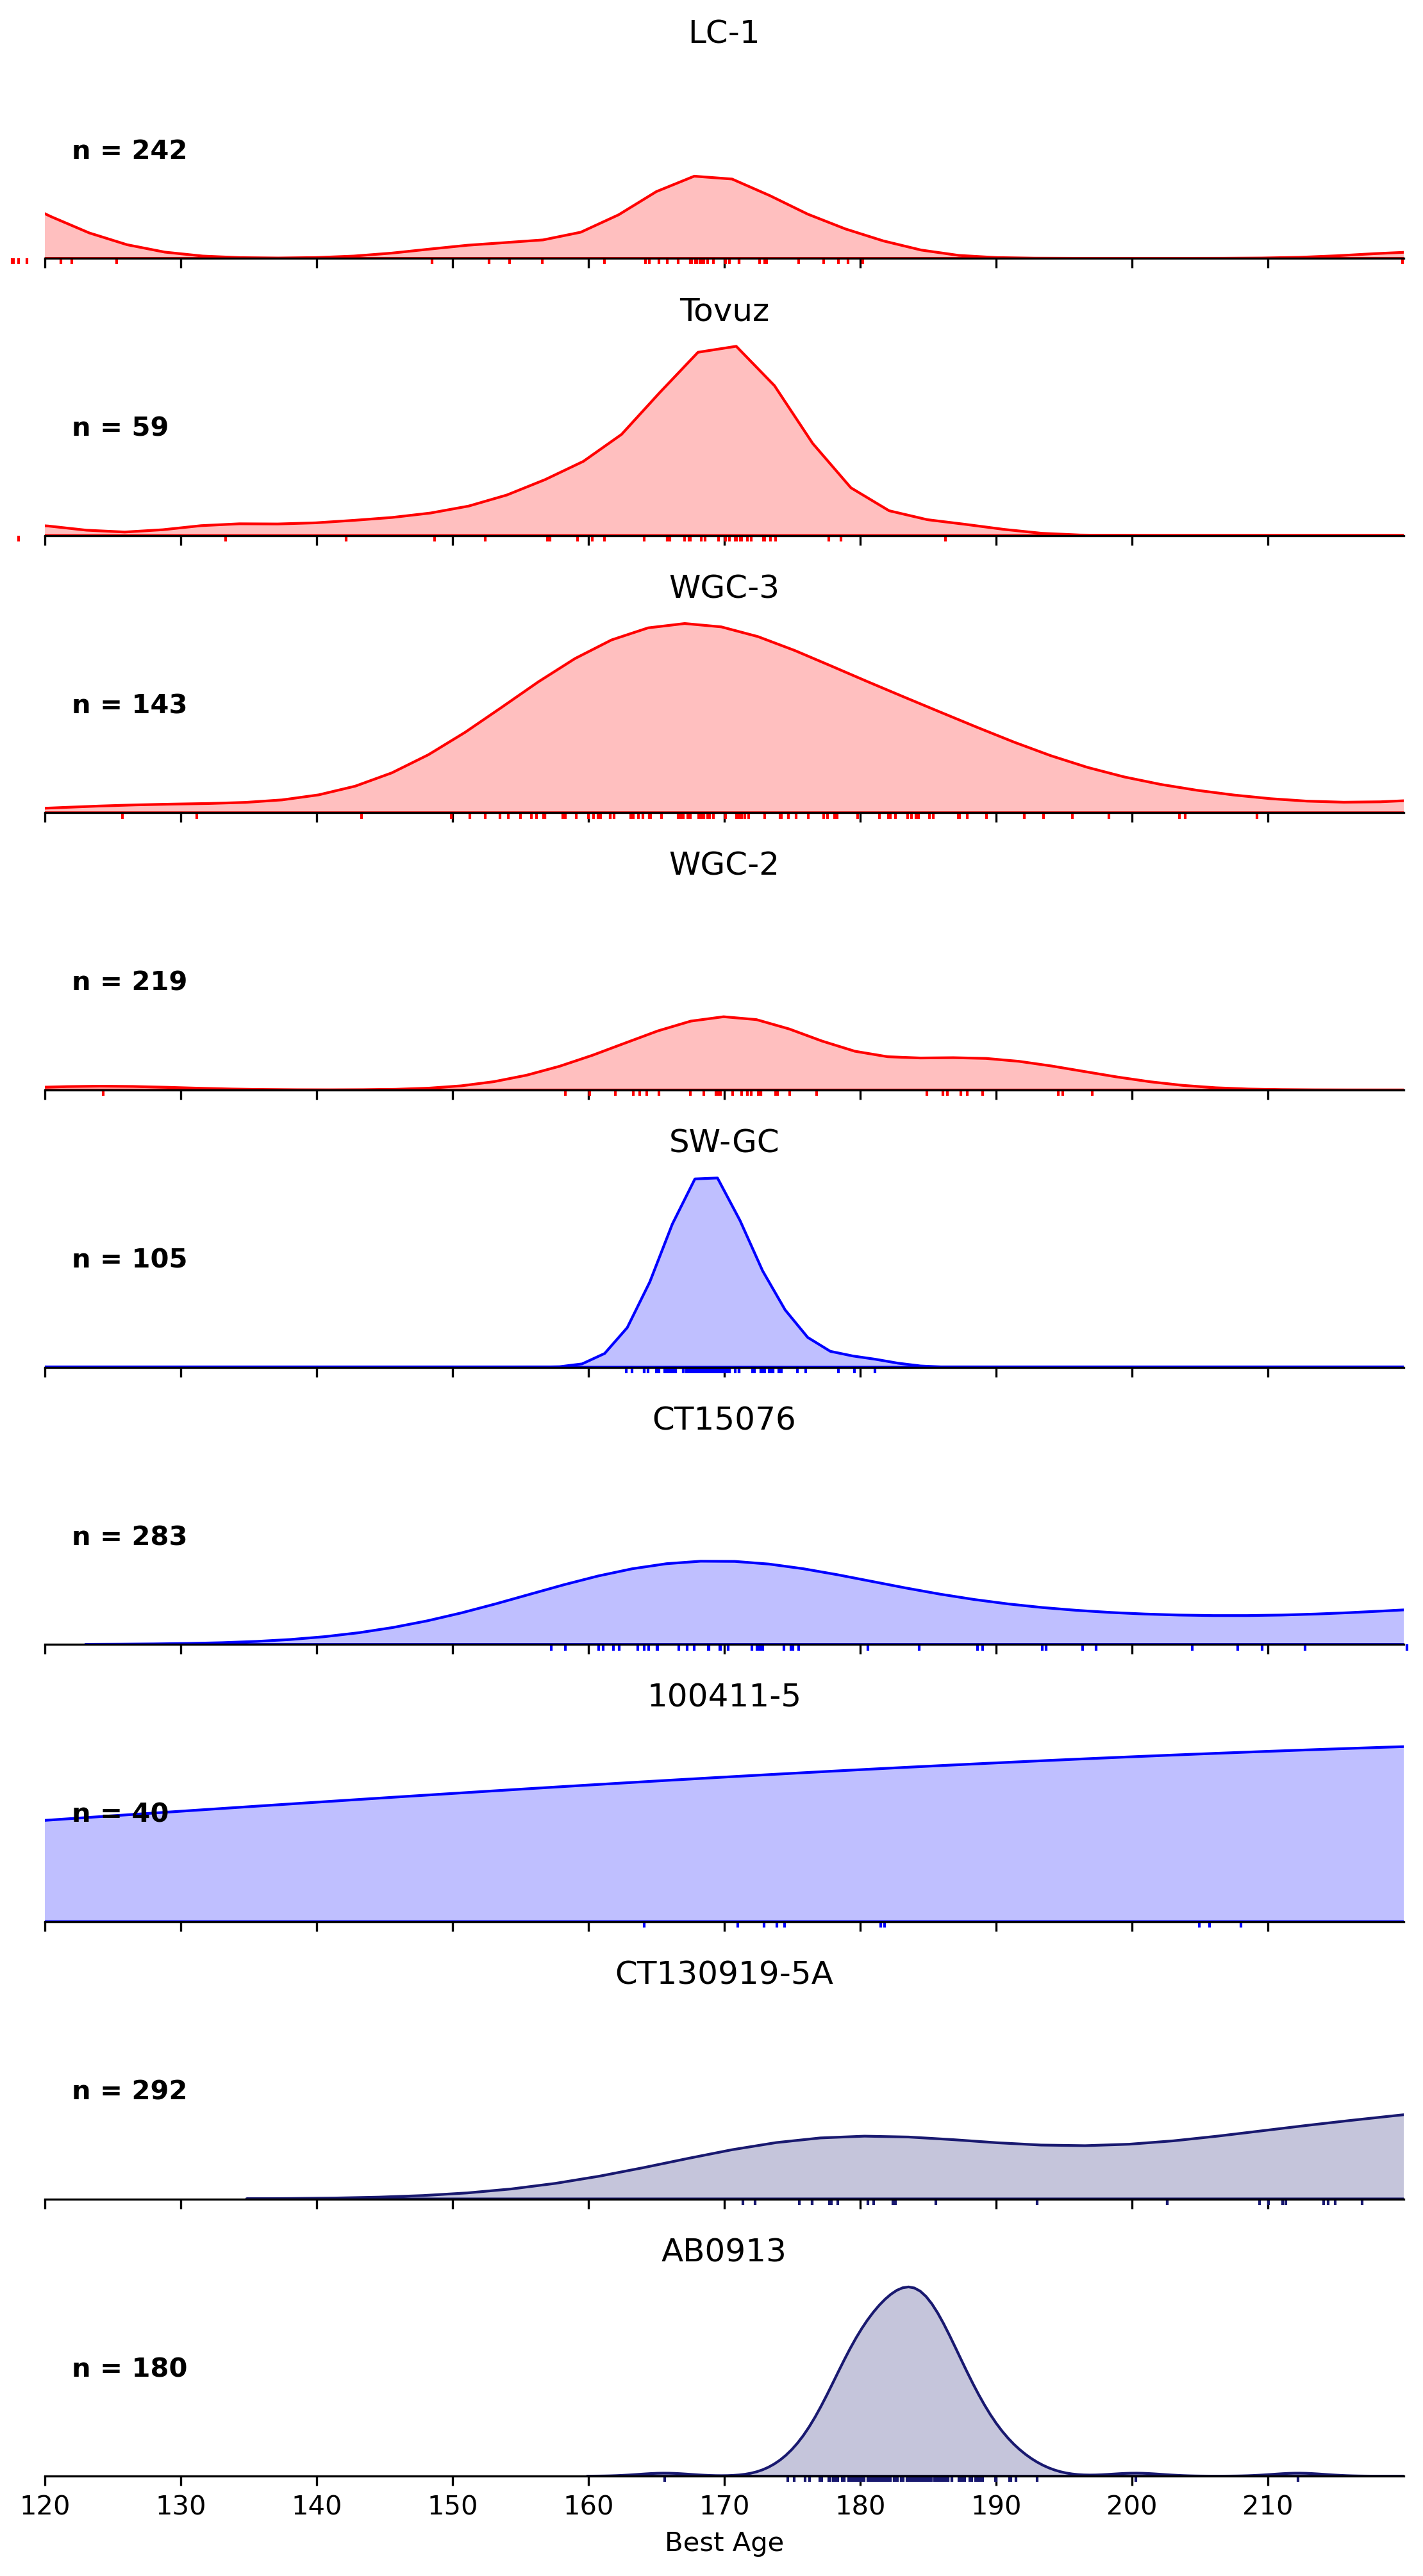

In [9]:
j_names = ['AB0913','CT130919-5A','SW-GC','Tovuz','LC-1','WGC-2','CT15076','WGC-3','100411-5']

j_samples = plot_fault_block(j_names,log_scale=False,xlim=(120,220),ticks=np.arange(120,220,10),save=True,filename='170peak.pdf')

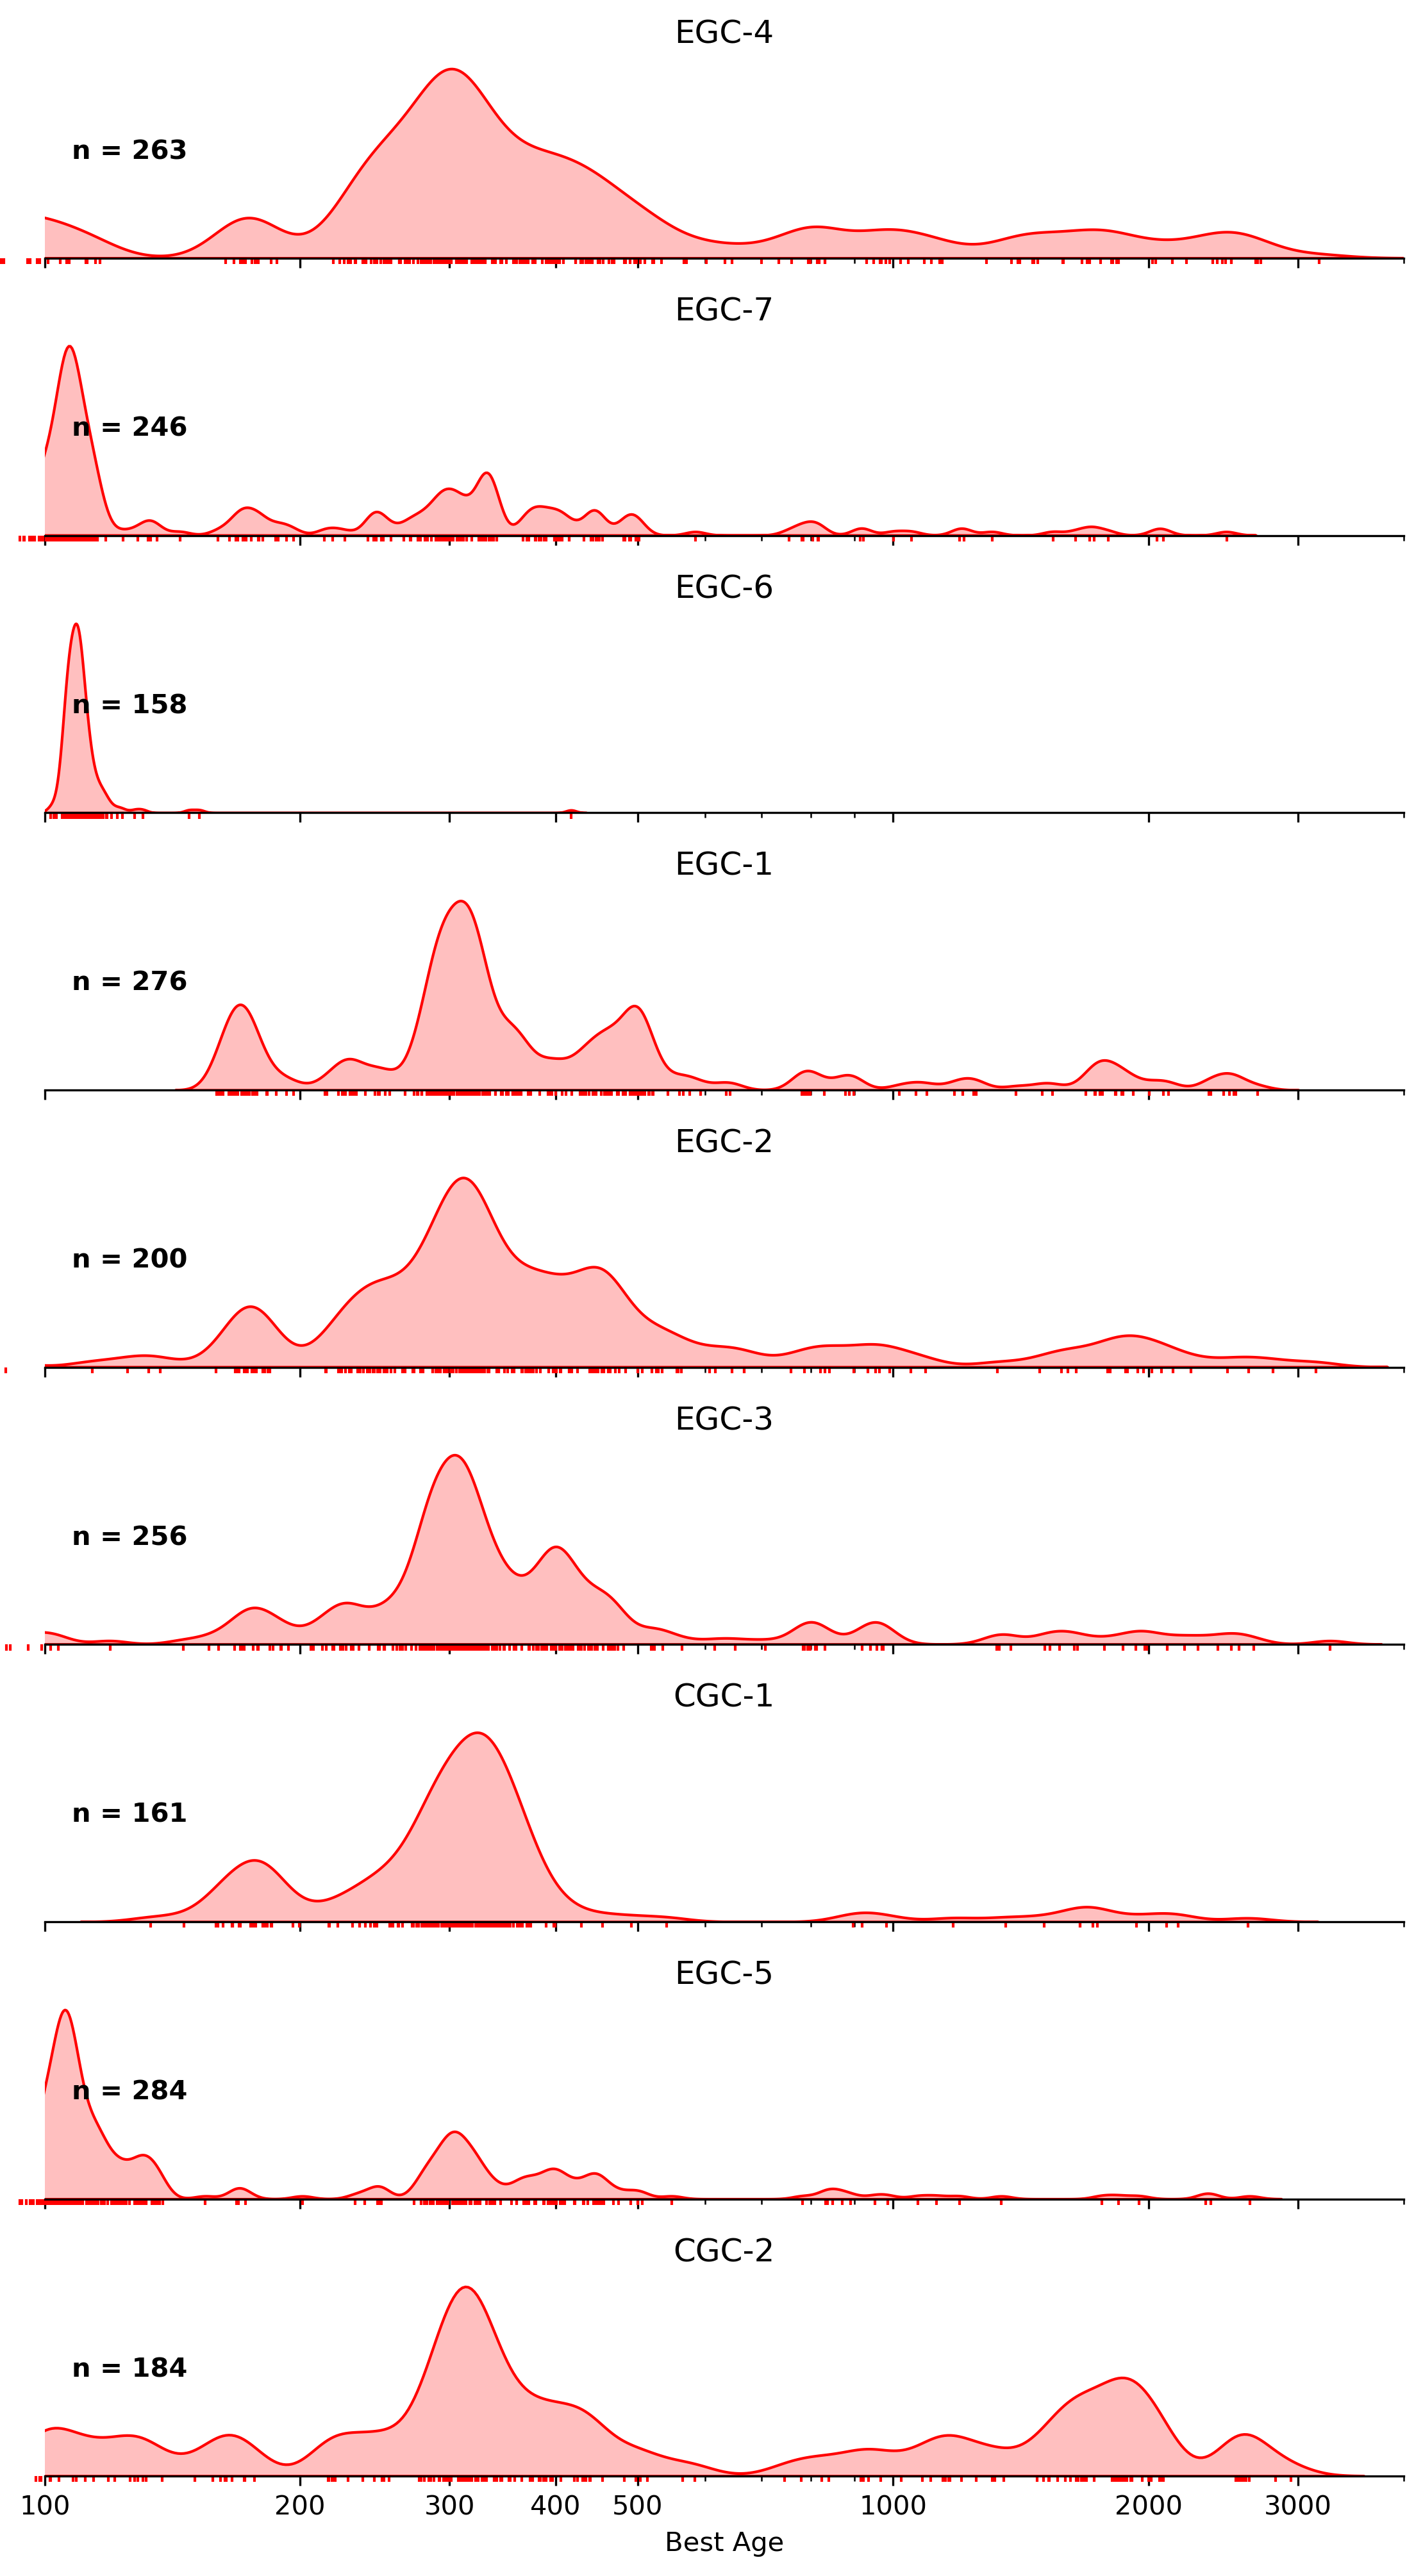

In [10]:
egc = ['EGC-1','EGC-2','EGC-3','EGC-4','EGC-5','EGC-6','EGC-7','CGC-1','CGC-2']

egc_samples = plot_fault_block(egc)